In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA   

Loading the Dataset

In [2]:
data = pd.read_csv("house_price_regression_dataset.csv")

print("Missing values per column:\n", data.isna().sum())
print("\nTotal duplicate rows:", data.duplicated().sum())


print(data.head())
print(data.describe())
print(data.info())

Missing values per column:
 Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64

Total duplicate rows: 0
   Square_Footage  Num_Bedrooms  Num_Bathrooms  Year_Built  Lot_Size  \
0            1360             2              1        1981  0.599637   
1            4272             3              3        2016  4.753014   
2            3592             1              2        2016  3.634823   
3             966             1              2        1977  2.730667   
4            4926             2              1        1993  4.699073   

   Garage_Size  Neighborhood_Quality   House_Price  
0            0                     5  2.623829e+05  
1            1                     6  9.852609e+05  
2            0                     9  7.779774e+05  
3            1                     8  2.296989e+05  
4            0              

Exploratory Data Analysis for House Price
Plotted scatter plots to examine relationships between key features and `House_Price`.  
Used a boxplot to detect outliers and understand the distribution of house prices

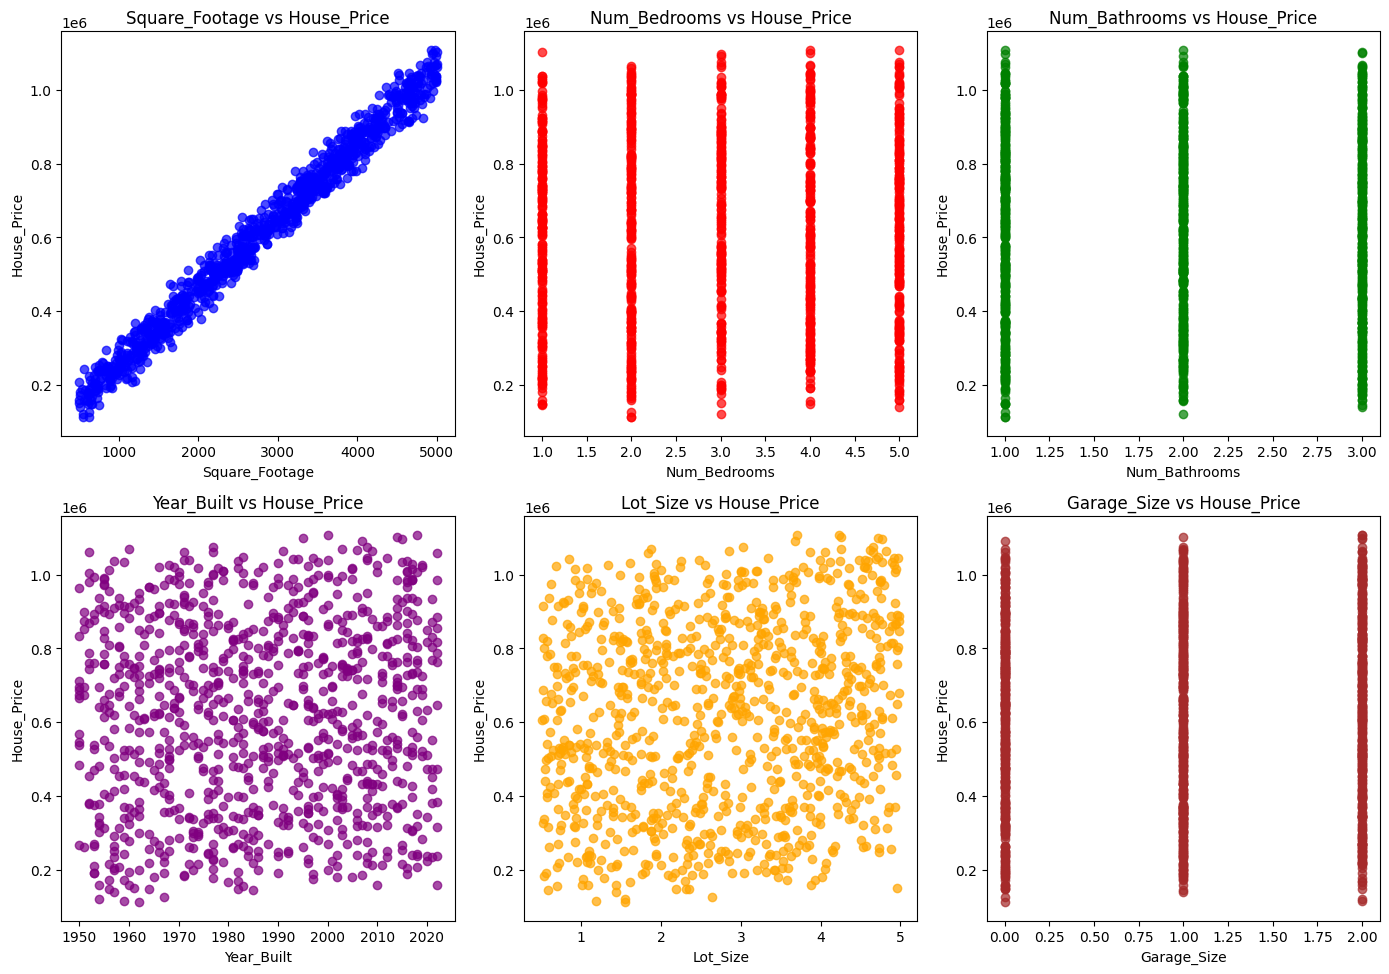

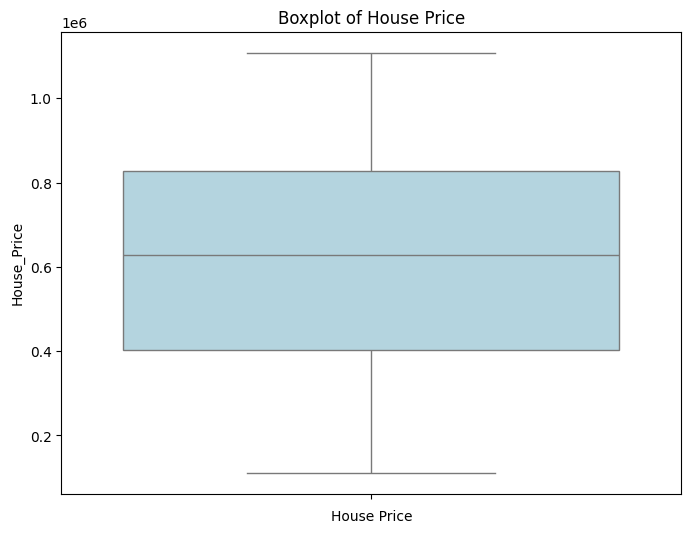

In [3]:
features = ["Square_Footage", "Num_Bedrooms", "Num_Bathrooms", "Year_Built", "Lot_Size", "Garage_Size"]
colors = ['blue', 'red', 'green', 'purple', 'orange', 'brown']
plt.figure(figsize=(14, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    plt.scatter(data[feature], data['House_Price'], alpha=0.7, color=colors[i])
    plt.title(f'{feature} vs House_Price')
    plt.xlabel(feature)
    plt.ylabel('House_Price')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data['House_Price'], color='lightblue')
plt.title('Boxplot of House Price')
plt.xlabel('House Price')
plt.show()

Simple Linear Regression (SLR)
Trained a linear regression model using `Square_Footage` to predict `House_Price`.  
Evaluated performance using R² and Mean Squared Error (MSE) on the test set

In [4]:
X_slr = data[['Square_Footage']]
y_slr = data['House_Price']
X_train_slr, X_test_slr, y_train_slr, y_test_slr = train_test_split(X_slr, y_slr, test_size=0.2, random_state=42)
slr = LinearRegression()
slr.fit(X_train_slr, y_train_slr)
y_pred_slr = slr.predict(X_test_slr)
print("Simple Linear Regression")
print("R2:", r2_score(y_test_slr, y_pred_slr))
print("MSE:", mean_squared_error(y_test_slr, y_pred_slr))

Simple Linear Regression
R2: 0.9832220800154357
MSE: 1081485546.4889545


Multiple Linear Regression (MLR)
Trained a regression model using multiple features to predict `House_Price` after standardizing the data

In [5]:
X_mlr = data[['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built', 'Lot_Size', 'Garage_Size']]
y_mlr = data['House_Price']
X_train_mlr, X_test_mlr, y_train_mlr, y_test_mlr = train_test_split(X_mlr, y_mlr, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_mlr_scaled = scaler.fit_transform(X_train_mlr)
X_test_mlr_scaled = scaler.transform(X_test_mlr)
mlr = LinearRegression()
mlr.fit(X_train_mlr_scaled, y_train_mlr)
y_pred_mlr = mlr.predict(X_test_mlr_scaled)
print("Multiple Linear Regression")
print("R2:", r2_score(y_test_mlr, y_pred_mlr))
print("RMSE:", np.sqrt(mean_squared_error(y_test_mlr, y_pred_mlr)))

Multiple Linear Regression
R2: 0.9984298273059791
RMSE: 10060.394489510378


Polynomial Regression
Applied polynomial regression with degrees 2, 3, and 4 to model non-linear relationships between `Square_Footage` and `House_Price`

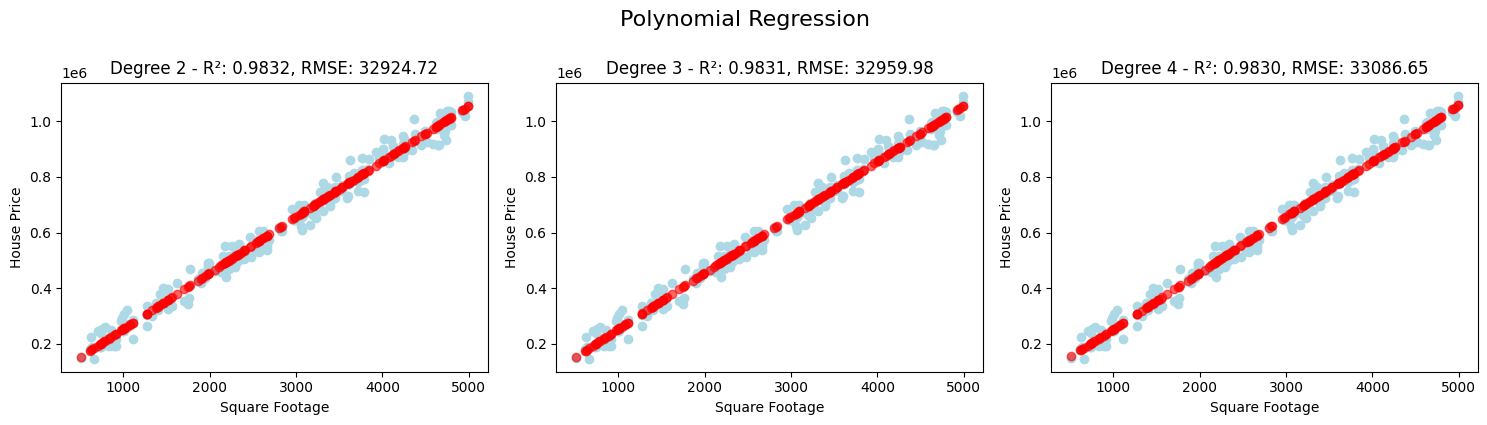

[(2, 0.9831824991456208, 32924.71539922089), (3, 0.9831464576943129, 32959.976864050324), (4, 0.9830166616778735, 33086.652561913244)]


In [6]:
X_poly = data[['Square_Footage']]
y_poly = data['House_Price']
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y_poly, test_size=0.2, random_state=42)
degrees = [2, 3, 4]
poly_results = []
plt.figure(figsize=(15, 4))
for i, degree in enumerate(degrees):
    model = make_pipeline(PolynomialFeatures(degree), StandardScaler(), LinearRegression())
    model.fit(X_train_poly, y_train_poly)
    y_pred = model.predict(X_test_poly)
    r2 = r2_score(y_test_poly, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test_poly, y_pred))
    poly_results.append((degree, r2, rmse))
    plt.subplot(1, 3, i+1)
    plt.scatter(X_test_poly, y_test_poly, color='lightblue')
    plt.scatter(X_test_poly, y_pred, color='red', alpha=0.6)
    plt.title(f"Degree {degree} - R²: {r2:.4f}, RMSE: {rmse:.2f}")
    plt.xlabel('Square Footage')
    plt.ylabel('House Price')
plt.tight_layout()
plt.suptitle("Polynomial Regression", y=1.05, fontsize=16)
plt.show()

print(poly_results)

y_test_regression = y_test_mlr.copy()